# Importing Dataset

In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print(os.listdir("../input"))


/kaggle/input/earthquake/all_month.csv
['earthquake']


In [2]:
data = pd.read_csv("/kaggle/input/earthquake/all_month.csv")
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-02-04T02:52:38.150Z,38.832832,-122.819336,1.800000,0.85,md,6.0,103.00,0.01188,0.0000,...,2022-02-04T02:54:15.830Z,"8km NW of The Geysers, CA",earthquake,0.53,1.71,NaN,1.0,automatic,nc,nc
1,2022-02-04T02:50:47.970Z,32.718167,-117.160167,16.360000,0.99,ml,8.0,241.00,0.18440,0.0900,...,2022-02-04T02:54:22.814Z,"4km NNE of Coronado, CA",earthquake,0.56,1.02,0.213000,4.0,automatic,ci,ci
2,2022-02-04T02:44:23.729Z,36.905100,-117.367100,9.400000,1.50,ml,14.0,184.66,0.09100,0.3503,...,2022-02-04T02:47:57.431Z,"54 km W of Beatty, Nevada",earthquake,NaN,0.50,0.290000,9.0,automatic,nn,nn
3,2022-02-04T02:32:05.480Z,19.483167,-155.644667,2.910000,0.81,md,15.0,68.00,NaN,0.1200,...,2022-02-04T02:56:11.570Z,"23 km E of Honaunau-Napoopoo, Hawaii",earthquake,0.33,0.88,0.264057,7.0,reviewed,hv,hv
4,2022-02-04T02:22:41.920Z,19.198999,-155.436661,34.470001,2.00,ml,49.0,137.00,NaN,0.1100,...,2022-02-04T02:28:13.650Z,"4 km E of Pāhala, Hawaii",earthquake,0.46,0.61,4.090000,11.0,automatic,hv,hv


In [3]:
data.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

# Data Preprocessing

In [4]:
data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,10300.000000,10300.000000,10300.000000,10298.000000,7692.000000,8900.000000,7340.000000,10300.000000,7735.000000,10300.000000,8361.000000,8886.000000
mean,35.845473,-110.053138,21.017624,1.625816,20.145866,120.363762,0.643415,0.257429,1.722715,2.769873,0.276073,14.064483
std,19.260664,68.519661,51.742311,1.277734,15.539910,66.192231,2.162986,0.278112,3.075841,30.427658,0.512642,26.798853
min,-65.343700,-179.998500,-3.500000,-1.260000,2.000000,13.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000
25%,33.427625,-149.816475,2.990000,0.800000,9.000000,71.000000,0.020790,0.080000,0.280000,0.470000,0.103000,4.000000
50%,37.981917,-119.824950,8.191171,1.400000,16.000000,105.000000,0.062765,0.140000,0.470000,0.785595,0.160000,7.000000
75%,44.350983,-116.180750,15.075000,2.070000,26.000000,154.000000,0.147000,0.320000,1.014939,1.800000,0.240000,15.000000
max,85.309300,179.990100,641.930000,6.800000,146.000000,352.000000,39.750000,2.240000,30.900000,2365.500000,5.350000,618.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10300 non-null  object 
 1   latitude         10300 non-null  float64
 2   longitude        10300 non-null  float64
 3   depth            10300 non-null  float64
 4   mag              10298 non-null  float64
 5   magType          10298 non-null  object 
 6   nst              7692 non-null   float64
 7   gap              8900 non-null   float64
 8   dmin             7340 non-null   float64
 9   rms              10300 non-null  float64
 10  net              10300 non-null  object 
 11  id               10300 non-null  object 
 12  updated          10300 non-null  object 
 13  place            10300 non-null  object 
 14  type             10300 non-null  object 
 15  horizontalError  7735 non-null   float64
 16  depthError       10300 non-null  float64
 17  magError    

 We can see that there are some null values

In [6]:
data.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   2
magType               2
nst                2608
gap                1400
dmin               2960
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2565
depthError            0
magError           1939
magNst             1414
status                0
locationSource        0
magSource             0
dtype: int64

In [7]:
data.shape

(10300, 22)

In [8]:
round(data.isnull().sum()*100 /len(data), 2)

time                0.00
latitude            0.00
longitude           0.00
depth               0.00
mag                 0.02
magType             0.02
nst                25.32
gap                13.59
dmin               28.74
rms                 0.00
net                 0.00
id                  0.00
updated             0.00
place               0.00
type                0.00
horizontalError    24.90
depthError          0.00
magError           18.83
magNst             13.73
status              0.00
locationSource      0.00
magSource           0.00
dtype: float64

As we can see that mag, magtype, nst, gap, dmin, horizontalError, magNst, magError have a lot of null values. Hence, we are replacing these values with mean, except for magType which has str dtype

In [9]:
data['magType'].value_counts()

ml       5800
md       3411
mb        923
mww       107
mwr        24
mb_lg      15
mw         10
mh          7
ms_20       1
Name: magType, dtype: int64

Since, magType has maximum 'ml', we will replace nan with 'ml'

# Replacing null values

In [10]:
nst_mean = data['nst'].mean()
data['nst'].fillna(value = nst_mean, inplace = True)

mag_mean = data['mag'].mean()
data['mag'].fillna(value = mag_mean, inplace = True)

gap_mean = data['gap'].mean()
data['gap'].fillna(value = gap_mean, inplace = True)

horizontalError_mean = data['horizontalError'].mean()
data['horizontalError'].fillna(value = horizontalError_mean, inplace = True)

magError_mean = data['magError'].mean()
data['magError'].fillna(value = magError_mean, inplace = True)

magNst_mean = data['magNst'].mean()
data['magNst'].fillna(value = magNst_mean, inplace = True)

dmin_mean = data['dmin'].mean()
data['dmin'].fillna(value = dmin_mean, inplace = True)

data['magType'].fillna('ml', inplace = True)

In [11]:
data.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

# Checking the Correlation

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [13]:
# Changing the format of time

timestamp_arr = []
for d in data["time"]:
    date_format = datetime.datetime.strptime(d,"%Y-%m-%dT%H:%M:%S.%fZ")
    timestamp_arr.append(datetime.datetime.timestamp(date_format))


In [14]:
timestamp = pd.Series(timestamp_arr)
data['timestamp'] = timestamp.values
data["timestamp"].head()

0    1.643943e+09
1    1.643943e+09
2    1.643943e+09
3    1.643942e+09
4    1.643941e+09
Name: timestamp, dtype: float64

<AxesSubplot:>

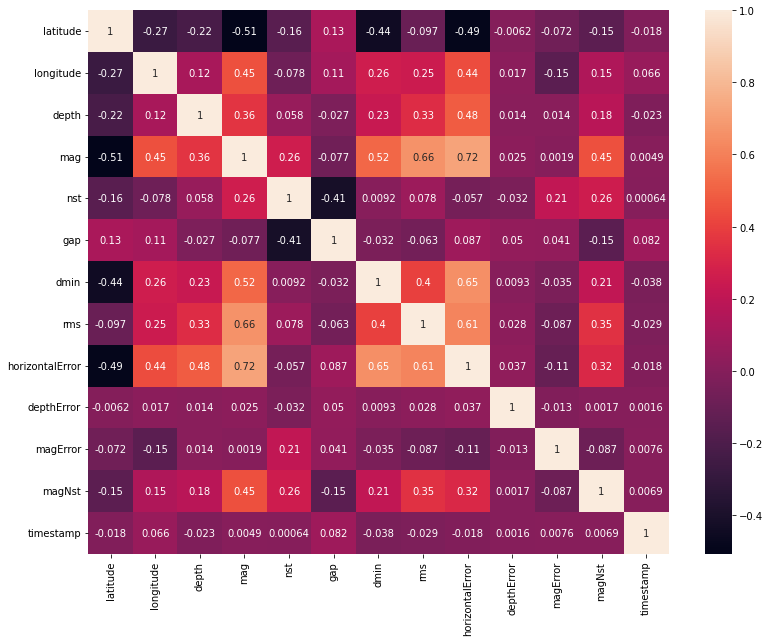

In [15]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), annot = True)

1. Our dependent variables are mag and depth.
2. With mag, latitude has high negative correlation while longitude, dmin, rms, horizontalError and magNst have high positive correlation
3. With depth dmin, rms, horizontalError have high positive correlation.

# Checking for Outliers

<AxesSubplot:xlabel='latitude', ylabel='mag'>

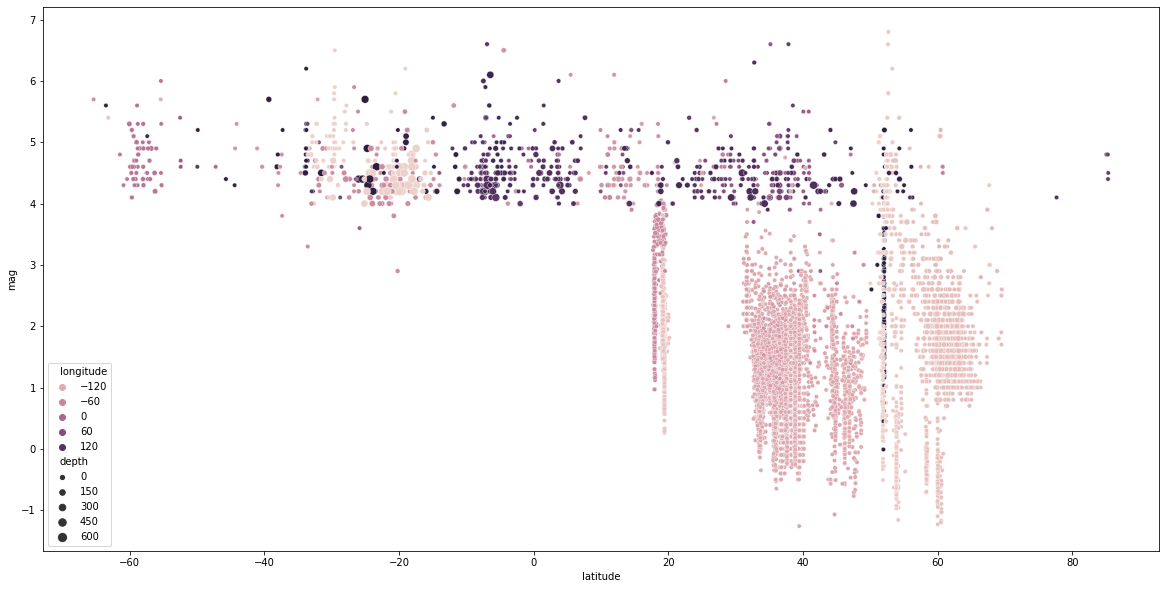

In [16]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x="latitude", y="mag", hue = 'longitude', size = 'depth')

# Dropping Columns

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10300 non-null  object 
 1   latitude         10300 non-null  float64
 2   longitude        10300 non-null  float64
 3   depth            10300 non-null  float64
 4   mag              10300 non-null  float64
 5   magType          10300 non-null  object 
 6   nst              10300 non-null  float64
 7   gap              10300 non-null  float64
 8   dmin             10300 non-null  float64
 9   rms              10300 non-null  float64
 10  net              10300 non-null  object 
 11  id               10300 non-null  object 
 12  updated          10300 non-null  object 
 13  place            10300 non-null  object 
 14  type             10300 non-null  object 
 15  horizontalError  10300 non-null  float64
 16  depthError       10300 non-null  float64
 17  magError    

1. First we will drop columns that have dtype object. This includes time, magType, net, id, updated, place, type, status, magSource, locationSource.
2. Next, as observed in the heatmap, we can drop the columns that have low correlation. This includes magError, depthError, gap, nst, magnst, timestamp.
3. Moreover, after researching, we found out that horizontalError, rms, dmin is also not required for our model.

Hence in the end we are only left with longitude and latitude as our independent variables and depth and mag as dependent variables.

In [18]:
data = data[[ 'time', 'latitude', 'longitude', 'depth', 'mag']]
data.head()

,time,latitude,longitude,depth,mag
0,2022-02-04T02:52:38.150Z,38.832832,-122.819336,1.800000,0.85
1,2022-02-04T02:50:47.970Z,32.718167,-117.160167,16.360000,0.99
2,2022-02-04T02:44:23.729Z,36.905100,-117.367100,9.400000,1.50
3,2022-02-04T02:32:05.480Z,19.483167,-155.644667,2.910000,0.81
4,2022-02-04T02:22:41.920Z,19.198999,-155.436661,34.470001,2.00


In [19]:
import datetime

timestamp_arr = []
for d in data["time"]:
    date_format = datetime.datetime.strptime(d,"%Y-%m-%dT%H:%M:%S.%fZ")
    timestamp_arr.append(datetime.datetime.timestamp(date_format))


In [20]:
timestamp = pd.Series(timestamp_arr)
data['timestamp'] = timestamp.values
data["timestamp"].head()

0    1.643943e+09
1    1.643943e+09
2    1.643943e+09
3    1.643942e+09
4    1.643941e+09
Name: timestamp, dtype: float64

In [21]:
data.isnull().sum()

time         0
latitude     0
longitude    0
depth        0
mag          0
timestamp    0
dtype: int64

In [22]:
final_data = data.drop(['time'], axis=1)
final_data.head()

,latitude,longitude,depth,mag,timestamp
0,38.832832,-122.819336,1.800000,0.85,1.643943e+09
1,32.718167,-117.160167,16.360000,0.99,1.643943e+09
2,36.905100,-117.367100,9.400000,1.50,1.643943e+09
3,19.483167,-155.644667,2.910000,0.81,1.643942e+09
4,19.198999,-155.436661,34.470001,2.00,1.643941e+09


In [23]:
X = final_data[['latitude', 'longitude']]
y = final_data[['mag', 'depth']]

In [24]:
print(X.shape, y.shape)

(10300, 2) (10300, 2)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=420)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)


(6901, 2) (3399, 2) (6901, 2) (3399, 2)


In [26]:
from sklearn.linear_model import LinearRegression

reg1 = LinearRegression()
reg1.fit(X_train, y_train)

reg1.score(X_test, y_test)


0.19583888734116028

In [27]:
from sklearn.linear_model import Ridge

reg2 = Ridge()
reg2.fit(X_train, y_train)

reg2.score(X_test, y_test)

0.19583888788502085

In [28]:
from sklearn.linear_model import Lasso

reg3 = Lasso()
reg3.fit(X_train, y_train)

reg3.score(X_test, y_test)

0.19533877924755705

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

polyreg=make_pipeline(PolynomialFeatures(3),LinearRegression())
polyreg.fit(X_train,y_train)

polyreg.score(X_test, y_test)


0.42893932594898043

In [30]:
from sklearn.tree import DecisionTreeRegressor

dtreg = DecisionTreeRegressor(random_state = 420)
dtreg.fit(X_train, y_train)

dtreg.score(X_test, y_test)

0.6541532237505099

In [31]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(random_state = 420)
rfreg.fit(X_train, y_train)

rfreg.score(X_test, y_test)

0.8062971333229174

In [32]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor()
knnreg.fit(X_train, y_train)

knnreg.score(X_test, y_test)

0.7709321987694373